# Session 2
## Experiment 0
###  Lab

#### Objectives

To understand the following concepts:
  * Recap Visualization 
  * Visualization of higher dimensional data in lower dimensions
  * Visualizing linear classifiers

We have a modified version of the fruits data. This time there are three attributes and 1 Label 
  1. Weight in grams
  2. Colour encoded as before (1 = RED ... )
  3. Number of seeds
  4. "A" or "B"
  
There are three files:
  * 01-fruits-labelled.csv
    - which has all four fields: Weight, Colour, Seeds, Label
  * 01-fruits.csv
    - which has: Weight, Colour, Seeds
  * 01-fruits-labels.csv
    - which has just the labels

## numpy notes
M.T is the Transpose of matrix M

dot(x, y) is a function that computes the dot product of two vectors a and b. Of course the dimensions must be appropriate.

In [1]:
import pandas as pd
data = pd.read_csv("../../Datasets/01-fruits.csv")
data

,Weight,Colour,Seeds
0,303,3,1
1,370,1,2
2,298,3,1
3,277,3,1
4,377,4,2
5,299,3,1
6,382,1,2
7,374,4,6
8,303,4,1
9,309,3,1


In [2]:
labels = pd.read_csv("../../Datasets/01-fruits-labels.csv").values.flatten()
labels

array(['B', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B',
       'B', 'A', 'B', 'A'], dtype=object)

Each fruit is a point in 3-dimensional space. Let us switch to a notation that is easier when dealing with many dimensions. That is an n-dimensional vector $\nu_n$ is $(x_1, x_2, ... x_n)$ 

Recall the discussions about classification being the same as finding a line that cleanly divides the data into the classes. In 3-dimensions we are looking for a 2-dimensional plane and in $n$-dimensions we are looking for a $n-1$ dimensional *hyperplane* that divides the points into two classes.

An equation of a plane is of the form $ax + by +cz = d$; 

or in a more formal notation: 

$a_0x_0 + a_1x_1 + a_2x_2 - c = 0$

This plane can be represented vectorially as $w = (a_0, a_1, a_2, -c)$

Now each point $p$ is represented by $(p_0, p_1, p_2)$ weight, colour and seeds respectively.

Now we can multiply $w$ and $p$ (after transposing w) and get a scalar value. We assert that, this scalar value identifies the class of this data: if it is less than 0 it is one class else it belongs to the other class.

**So the $w$ is a classifier** 

But $w$ is a $4 \times 1$ matrix and $p$ is a $3 \times 1$ matrix (vector). Mathematically it is conveneient to add a dimension to $p$ to make it  $(p_0, p_1, p_2, 1)$, transpose $w$ and multiply the two vectors.

In [3]:
import numpy as np
# For example, taking the first fruit (277, 3, 1) 
# we get (277,3,1,1) and taking w as (1,0,0,-312) and taking the dot product: 
w = np.array([1,0,0,-312])
f1 = (277,3,1,1)
np.dot(f1, w.T)

-35

In [4]:
f2 = (370,1,2,1)
np.dot(f2, w.T)

58

Let us use a different w, say (0.5, 15, -5, -200) and see how it works out.

In [5]:
w2 = np.array([0.5,15,-5,-200])
np.dot(f1, w2.T), np.dot(f2, w2.T)

(-21.5, -10.0)

So this w2 does not seem to do well. Let us try out each of these w's on the complete data. We first add a column of 1's to the data, instead of manually typing a 1 as the 4th element.

In [7]:
import numpy as np
data_aug = np.hstack([data.values, np.ones((data.shape[0],1))])
data_aug

array([[303.,   3.,   1.,   1.],
       [370.,   1.,   2.,   1.],
       [298.,   3.,   1.,   1.],
       [277.,   3.,   1.,   1.],
       [377.,   4.,   2.,   1.],
       [299.,   3.,   1.,   1.],
       [382.,   1.,   2.,   1.],
       [374.,   4.,   6.,   1.],
       [303.,   4.,   1.,   1.],
       [309.,   3.,   1.,   1.],
       [359.,   1.,   2.,   1.],
       [366.,   1.,   4.,   1.],
       [311.,   3.,   1.,   1.],
       [302.,   3.,   1.,   1.],
       [373.,   4.,   4.,   1.],
       [305.,   3.,   1.,   1.],
       [371.,   3.,   6.,   1.]])

In [8]:
np.dot(data_aug, w.T)

array([ -9.,  58., -14., -35.,  65., -13.,  70.,  62.,  -9.,  -3.,  47.,
        54.,  -1., -10.,  61.,  -7.,  59.])

In [9]:
list(zip(np.dot(data_aug, w.T), labels))

[(-9.0, 'B'),
 (58.0, 'A'),
 (-14.0, 'B'),
 (-35.0, 'B'),
 (65.0, 'A'),
 (-13.0, 'B'),
 (70.0, 'A'),
 (62.0, 'A'),
 (-9.0, 'B'),
 (-3.0, 'B'),
 (47.0, 'A'),
 (54.0, 'A'),
 (-1.0, 'B'),
 (-10.0, 'B'),
 (61.0, 'A'),
 (-7.0, 'B'),
 (59.0, 'A')]

In [10]:
def classify(w, v):
    if np.dot(v, w.T) > 0:
        return "A"
    else:
        return "B"

In [11]:
list(zip([classify(w, a) for a in data_aug], labels))

[('B', 'B'),
 ('A', 'A'),
 ('B', 'B'),
 ('B', 'B'),
 ('A', 'A'),
 ('B', 'B'),
 ('A', 'A'),
 ('A', 'A'),
 ('B', 'B'),
 ('B', 'B'),
 ('A', 'A'),
 ('A', 'A'),
 ('B', 'B'),
 ('B', 'B'),
 ('A', 'A'),
 ('B', 'B'),
 ('A', 'A')]

Let us try the same with the other classifier, w2.

In [12]:
w2 = np.array([0.5, 15, -5, -200])
data_aug = np.hstack([data.values, np.ones((data.shape[0],1))])
prediction_vs_label = zip([classify(w2, a) for a in data_aug], labels)
print(list(prediction_vs_label))
accuracy = [p == l for p, l in zip([classify(w2, a) for a in data_aug], labels)].count(True)/len(data_aug) 
print(round(accuracy * 100, 1))

[('B', 'B'), ('B', 'A'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'A'), ('A', 'A'), ('A', 'B'), ('B', 'B'), ('B', 'A'), ('B', 'A'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('A', 'A')]
70.6


As you can see the classifier $(1,0,0,-312)$ is 100% accurate, while the classifier $(0.5, 15, -5, -200)$ is ~70% accurate

In [13]:
ldata = pd.read_csv("../../Datasets/01-fruits-labelled.csv")
apples = ldata[ldata.Label == "A"]
bananas = ldata[ldata.Label == "B"]

<IPython.core.display.Javascript object>


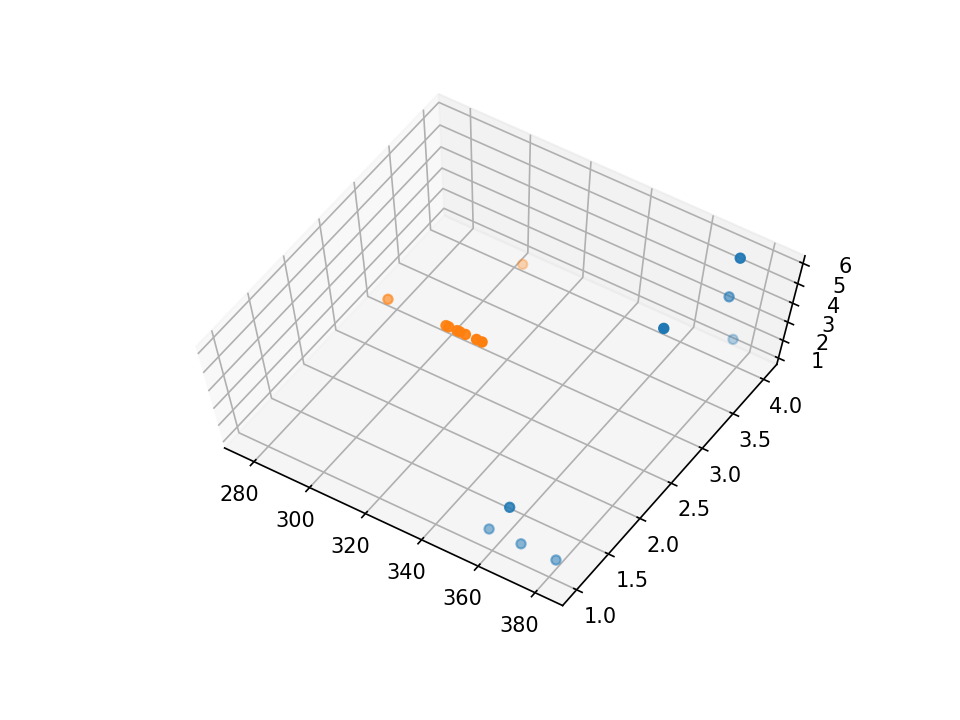

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# %matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(apples.Weight.values, apples.Colour.values, apples.Seeds.values)
ax.scatter(bananas.Weight.values, bananas.Colour.values, bananas.Seeds.values)
plt.show()

Pan and move and change the orientation to get a feel for how the data is distributed.

Notice how in some orientations, the data is falling into two clean halves (separable) while in others, it is intermixed (inseperable).

Let us switch back to two dimensions. 

**Plot apples and bananas in different colours using the labelled data as above.** 

Plot Colour vs Seeds, Weight vs Seeds, and Weight vs Colour. The last one we have already seen. 

What do you think these visualizations tell you?

<IPython.core.display.Javascript object>


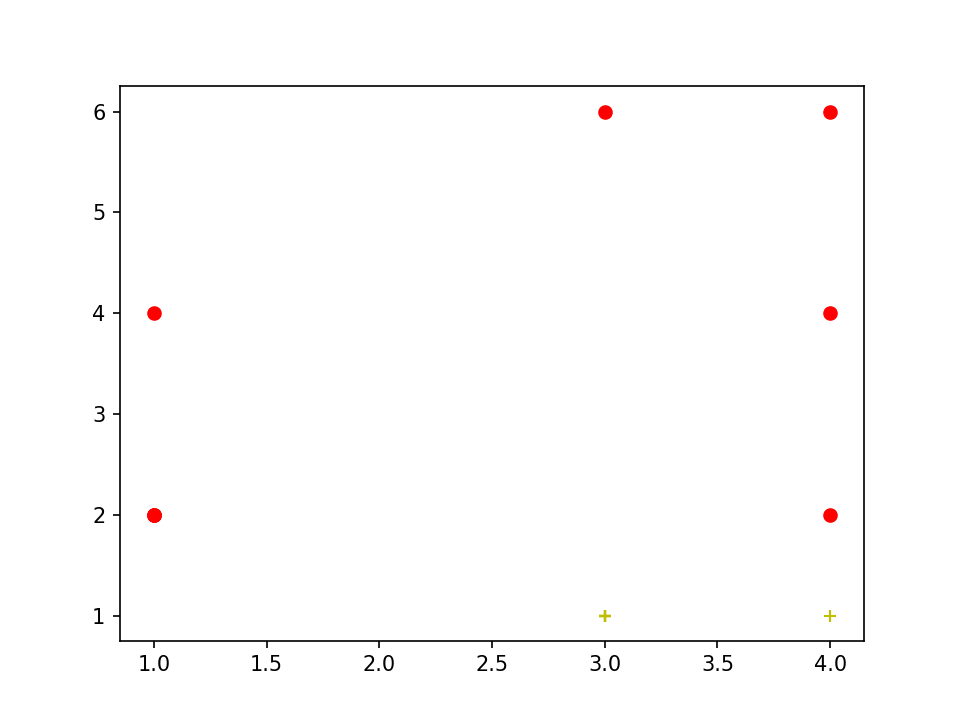

In [16]:
# Color vs Seeds
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(apples.Colour.values, apples.Seeds.values, "ro")
plt.plot(bananas.Colour.values, bananas.Seeds.values, "y+")
plt.show()

<IPython.core.display.Javascript object>


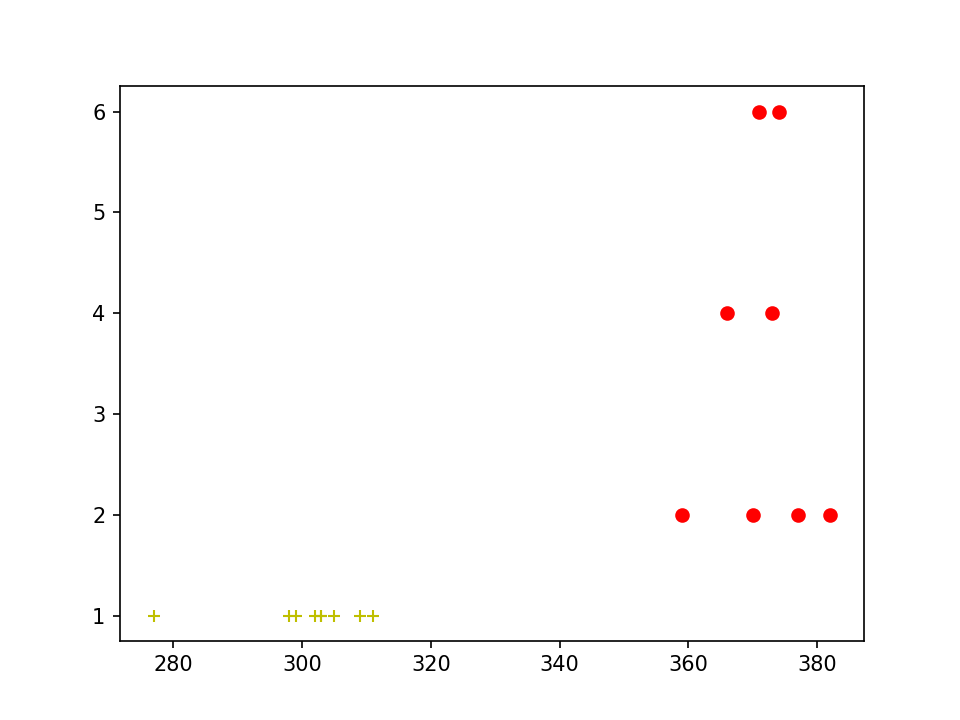

In [17]:
# Weight vs Seeds
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(apples.Weight.values, apples.Seeds.values, "ro")
plt.plot(bananas.Weight.values, bananas.Seeds.values, "y+")
plt.show()

<IPython.core.display.Javascript object>


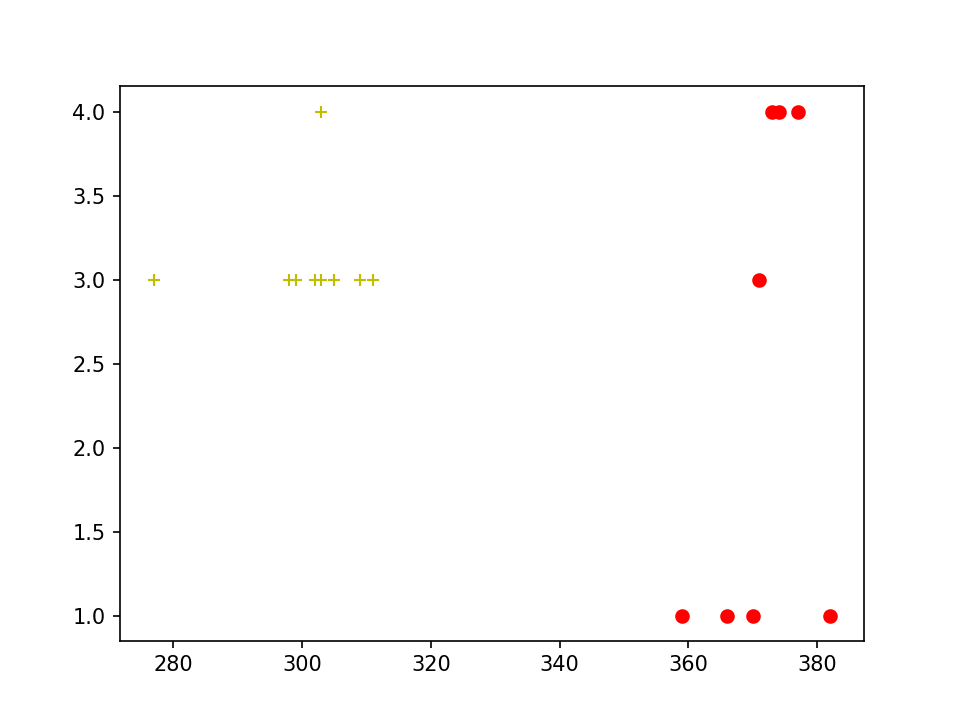

In [18]:
# Weight vs Color
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(apples.Weight.values, apples.Colour.values, "ro")
plt.plot(bananas.Weight.values, bananas.Colour.values, "y+")
plt.show()

## 3D to 2D

Let us now project the 3D data into 2D. There are many ways to do this, we are going to project all of the 3D data onto a plane. Since the plane is 2D, we shall visualize the projections of the data onto that plane on 2 dimensions.

In a way we saw this visually in the abov exercise, but the same can be achieved by matrix manipulations.

### 1. Projection into XY plane

Projection onto XY plane can be achieved using the following matrix:

$M1 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}$

Observe that M1 is a $2{\times}3$ matrix. A point on the 3D space $P = (x, y, z)^T$ is a $3{\times}1$ vector. Hence, dot product M1.P is a $2{\times}1$ vector, i.e. a point in 2D space.

Also observe that the unit vector in X direction in 3D space, $(1, 0, 0)^T$, gets projected into the first column of M1, i.e. $(1, 0)^T$, which is the unit vector in X direction in 2D space. (Try taking the dot product of M1 and P manually to see for yourself!)

Similarly, the unit vector in Y direction in 3D space, $(0, 1, 0)^T$, gets projected to the second column of M1, i.e. $(0, 1)^T$, which is the unit vector in Y direction in 2D space.

The unit vector in Z direction in 3D space gets projected into the origin. This is how 3D is converted to 2D.

In [19]:
# Projecting onto XY plane
M1 = np.array([[1, 0, 0], [0, 1, 0]])
data_in_XY = np.array([np.dot(M1, point.T) for point in data.values])
# Or: data_in_XY = np.dot(data.values, M1.T)

In [20]:
# Plot the transformed points
def plot_in_2D(data_in_2D, labels):
    apples_2D = data_in_2D[labels=='A']
    bananas_2D = data_in_2D[labels=='B']
    %matplotlib notebook
    plt.scatter(apples_2D[:, 0], apples_2D[:, 1], c='red', marker='o')
    plt.scatter(bananas_2D[:, 0], bananas_2D[:, 1], c='yellow', marker='+')
    plt.show()

<IPython.core.display.Javascript object>


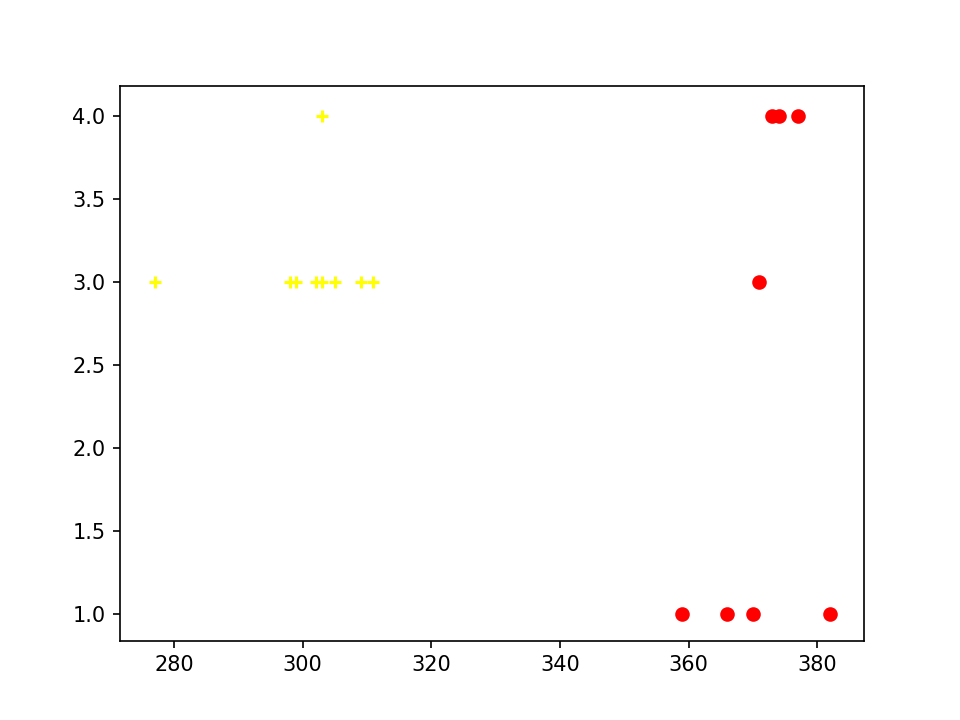

In [21]:
plot_in_2D(data_in_XY, labels)

We see that the two classes are now linearly separable.

**Exercise**: Draw a linear boundary between the two classes.

<IPython.core.display.Javascript object>


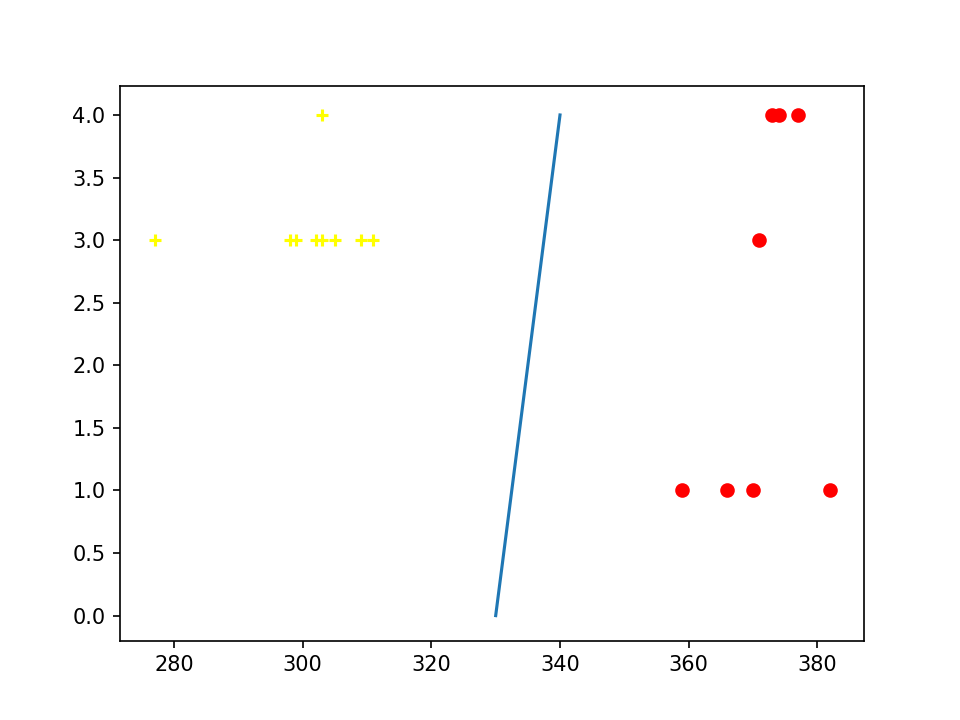

In [22]:
# Plot the transformed points
def plot_in_2D(data_in_2D, labels):
    apples_2D = data_in_2D[labels=='A']
    bananas_2D = data_in_2D[labels=='B']
    %matplotlib notebook
    plt.scatter(apples_2D[:, 0], apples_2D[:, 1], c='red', marker='o')
    plt.scatter(bananas_2D[:, 0], bananas_2D[:, 1], c='yellow', marker='+')
    
    # this is to draw a line.
    plt.plot([330, 340], [0,4])
    
    plt.show()
    
plot_in_2D(data_in_XY, labels)

### 2. Projection into YZ plane

Projection into YZ plane occurs with the following matrix:

$M2 = \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

(Why?)

**Exercise**: Project the data onto YZ plane, plot the graph.

**Exercise**: Is the data linearly separable? If so, draw a linear boundary between the two classes.**

<IPython.core.display.Javascript object>


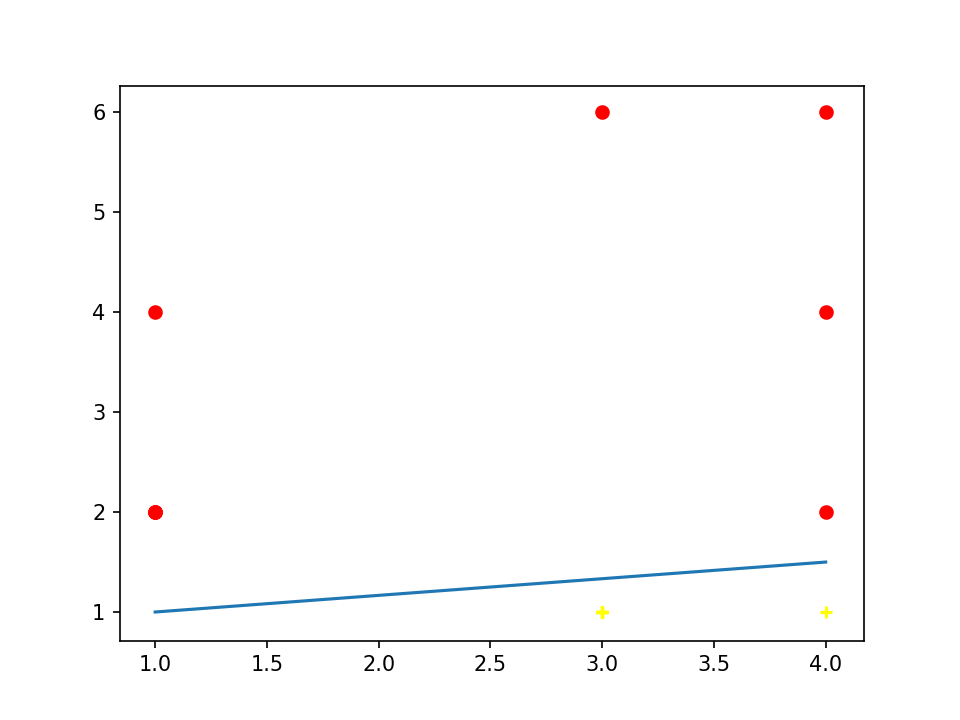

In [23]:
# Projecting onto XY plane
M2 = np.array([[0, 1, 0], [0, 0, 1]])
data_in_YZ = np.array([np.dot(M2, point.T) for point in data.values])

# Plot the transformed points
def plot_in_2D(data_in_2D, labels):
    apples_2D = data_in_2D[labels=='A']
    bananas_2D = data_in_2D[labels=='B']
    %matplotlib notebook
    plt.scatter(apples_2D[:, 0], apples_2D[:, 1], c='red', marker='o')
    plt.scatter(bananas_2D[:, 0], bananas_2D[:, 1], c='yellow', marker='+')
    plt.plot([1,4], [1,1.5])
    plt.show()
    
plot_in_2D(data_in_YZ, labels)

### 3. Projection into XZ plane

**Exercise**: What is the matrix that can project 3D data onto the XZ plane?

**Exercise**: Project the data onto XZ plane, plot the graph.

**Exercise**: Is the data linearly separable? If so, draw a linear boundary between the two classes.

<IPython.core.display.Javascript object>


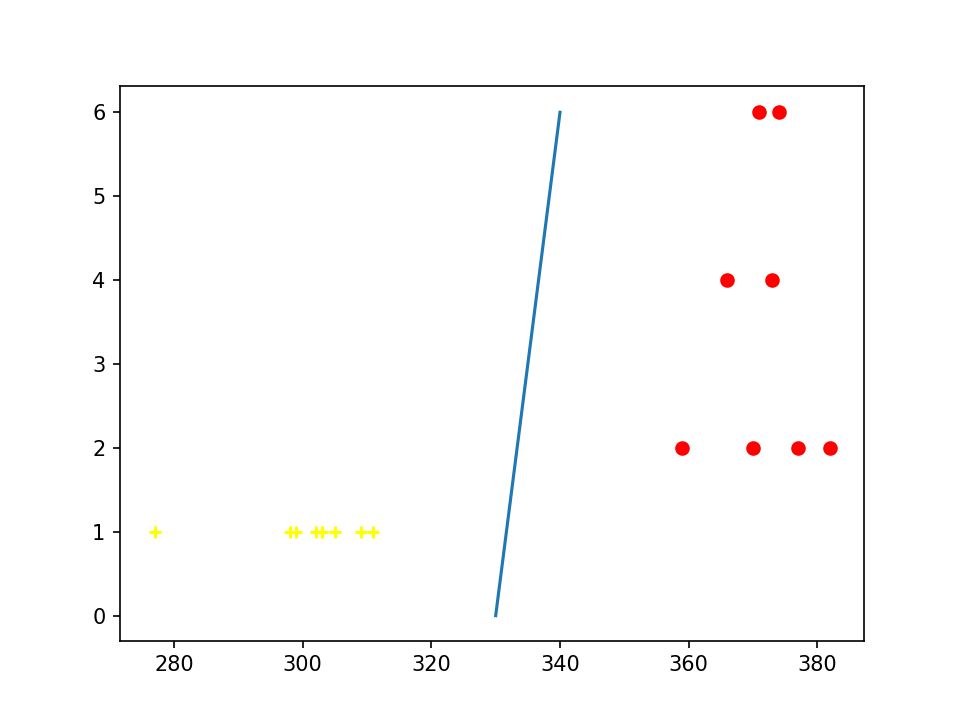

In [24]:
# Projecting onto XY plane
M3 = np.array([[1, 0, 0], [0, 0, 1]])
data_in_XZ = np.array([np.dot(M3, point.T) for point in data.values])

# Plot the transformed points
def plot_in_2D(data_in_2D, labels):
    apples_2D = data_in_2D[labels=='A']
    bananas_2D = data_in_2D[labels=='B']
    %matplotlib notebook
    plt.scatter(apples_2D[:, 0], apples_2D[:, 1], c='red', marker='o')
    plt.scatter(bananas_2D[:, 0], bananas_2D[:, 1], c='yellow', marker='+')
    plt.plot([330, 340], [0,6])
    plt.show()
    
plot_in_2D(data_in_XZ, labels)